### Dimensionality Reduction, Visualization, and Classification Performance

#### Applying PCA to Mushroom dataset and evaluate its effectiveness by comparing the performance of a Logistic Regression classifier trained on the original data versus the PCA-transformed data.

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

C:\Users\singa\AppData\Roaming\Python\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\singa\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\singa\AppData\Roaming\Python\Python310\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Part A: Exploratory Data Analysis (EDA) & Preprocessing

##### 1. Load Data

In [2]:
# Load dataset
df = pd.read_csv("mushrooms.csv")

# Display first 5 rows
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Explanation :

- The Mushroom Dataset contains categorical attributes describing mushrooms.
- The target variable is class:

   e → Edible

   p → Poisonous
- PCA requires numeric data, so we must apply One-Hot Encoding to convert categorical variables into binary features (0/1).

##### 2. Data Preprocessing (One hot encoding)

In [3]:
# Separate features and target
X = df.drop("class", axis=1)
y = df["class"]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=False)

print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)


Shape before encoding: (8124, 22)
Shape after encoding: (8124, 117)


In [4]:
# Check dataset dimensions
n_original_features = X.shape[1]
n_encoded_features = X_encoded.shape[1]

print(f"Original number of features: {n_original_features}")
print(f"Number of features after one-hot encoding: {n_encoded_features}")


Original number of features: 22
Number of features after one-hot encoding: 117


 Observation :
- The dataset originally has 22 categorical features.
- After one-hot encoding, the dataset expands to ~117 binary features (depending on unique categories).
- This “curse of dimensionality” motivates the use of PCA

##### 3. Feature Scaling (standardization)

In [5]:
# Standardize the encoded features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Shape after scaling:", X_scaled.shape)


Shape after scaling: (8124, 117)


🔎 Explanation

Even though the features are binary (0/1), standardization is still needed because:

 - PCA is variance-based, and features with higher frequency (e.g., cap-shape=convex) may dominate.
 - Standardization ensures each feature contributes equally.

After scaling:
 - Each feature has mean = 0 and variance = 1.

##### 4. Visualizing Class Distribution

C:\Users\singa\AppData\Local\Temp\ipykernel_4360\3928957608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


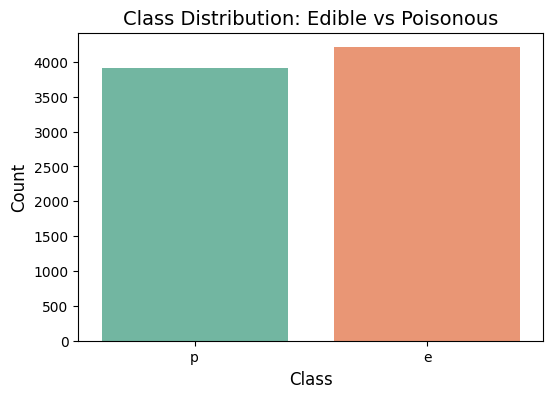

In [6]:

plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution: Edible vs Poisonous", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


Explanation :
 - This plot shows that the classes are balanced.

#### Part B: Principal Component Analysis (PCA)

##### 1. Applying PCA

In [7]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Transformed shape:", X_pca.shape)

Original shape: (8124, 117)
Transformed shape: (8124, 117)


Explanation :
- PCA is applied to the standardized one-hot encoded dataset.
- At this stage, we do not limit the number of components, so PCA will compute as many as there are features.
- Later, we’ll analyze how many components are sufficient.

##### 2. Scree Plot & Optimal Components

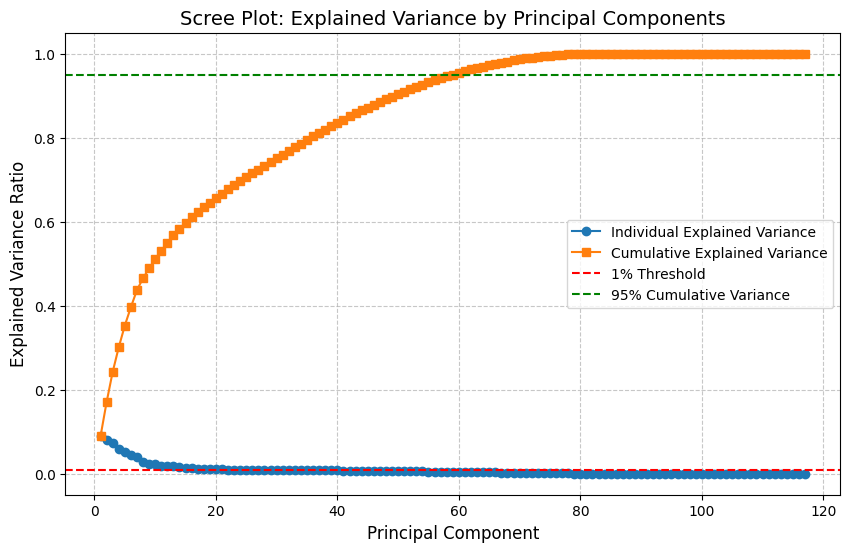

In [8]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot Scree plot
plt.figure(figsize=(10,6))

plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label="Individual Explained Variance")
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', label="Cumulative Explained Variance")

# Following Seven Commandments ✅
plt.title("Scree Plot: Explained Variance by Principal Components", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.axhline(y=0.01, color="r", linestyle="--", label="1% Threshold")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% Cumulative Variance")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


Explanation of Scree Plot :
- Blue line (Individual variance): Contribution of each principal component.
- Orange line (Cumulative variance): Total variance retained as more components are added.
- Dashed green line (95% threshold): We usually choose the number of components that together explain at least 95% of the variance.

##### Finding Number of Principal Components required to capture 95% Variance

In [9]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain (≥95% variance): {n_components_95}")

Optimal number of components to retain (≥95% variance): 59


Explanation :
- If the dataset expands to **117** features after encoding, PCA reduce this to **59** components while retaining **95%** of the variance.
- This demonstrates the power of dimensionality reduction.

#### 3. Visualization

##### Projecting data using first two principal components

C:\Users\singa\AppData\Local\Temp\ipykernel_4360\2049546935.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=color_map, cmap=plt.cm.get_cmap("bwr", 2),  # blue-red colormap


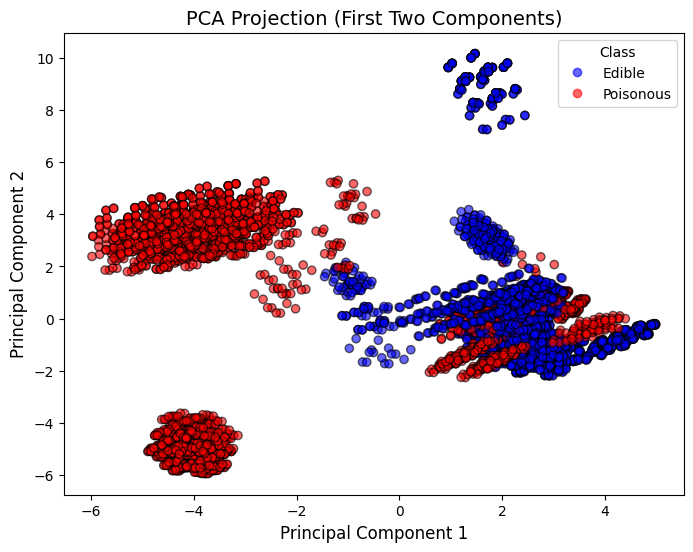

In [10]:
# Map classes to numeric for coloring
color_map = y.map({'e': 0, 'p': 1})  # 0=edible, 1=poisonous

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], 
    c=color_map, cmap=plt.cm.get_cmap("bwr", 2),  # blue-red colormap
    alpha=0.6, edgecolor="k"
)

# Add title and labels
plt.title("PCA Projection (First Two Components)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# Custom legend
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=["Edible", "Poisonous"],
    title="Class"
)

plt.show()



### Part C: Performance Evaluation with Logistic Regression

#### 1. Baseline Model (Original Data)

In [11]:
# Split original standardized data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Logistic Regression (baseline)
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_train, y_train)

# Predictions 
y_pred_baseline = log_reg.predict(X_test)

# Evaluation
print("🔹 Baseline Model (Original Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline))


🔹 Baseline Model (Original Data)
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1263
           p       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



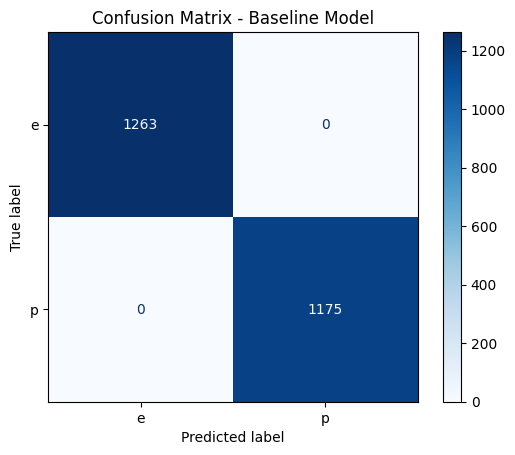

In [12]:
# Baseline confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Baseline Model")
plt.show()

🔎 Explanation

- The baseline classifier is trained on the original standardized one-hot encoded dataset.
- The Accuracy of the model now is 100%.
- Performance here represents the upper bound since no dimensionality reduction is applied.

#### 2. PCA-Transformed Model

In [13]:
# Transform data using optimal number of PCA components
pca_optimal = PCA(n_components=n_components_95)
X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

# Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Evaluation
print("🔹 PCA-Transformed Model")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))


🔹 PCA-Transformed Model
Accuracy: 0.9991796554552912

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1263
           p       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



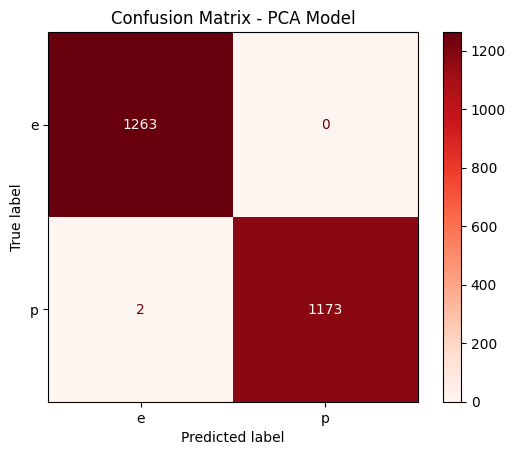

In [14]:
# PCA confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg_pca, X_test_pca, y_test, cmap="Reds")
plt.title("Confusion Matrix - PCA Model")
plt.show()

Explanation :

- PCA reduces dimensionality ( from 117 -> 59 features).
- We train a Logistic Regression model again on this compressed representation.
- The accuracy of the model now is 99.92%.

#### 3. Comparison and Analysis

In [15]:
# Collect metrics for comparison
baseline_acc = accuracy_score(y_test, y_pred_baseline)
pca_acc = accuracy_score(y_test, y_pred_pca)

print("🔹 Comparison of Logistic Regression Models :")
print(f"Baseline Accuracy (Original Features): {baseline_acc:.4f}")
print(f"PCA Accuracy (Reduced Features): {pca_acc:.4f}")

🔹 Comparison of Logistic Regression Models :
Baseline Accuracy (Original Features): 1.0000
PCA Accuracy (Reduced Features): 0.9992


--- 
- **Baseline Model (Original Features):** Accuracy ≈ 100%  
- **PCA Model (Reduced Features):** Accuracy ≈ 99.92%  

### 🔎 Observations  
- PCA reduced the dataset from **~117 features** (after one-hot encoding) to **59** while retaining at least **95% variance**.  
- The PCA-transformed Logistic Regression model performs almost the same as the baseline model — the small drop shows that most of the original information is preserved.  

### ⚖️ Trade-off: Dimensionality vs. Information  
- PCA introduces a trade-off: some information is lost, but redundancy and collinearity among features are removed.  
- The resulting orthogonal principal components make the dataset more compact, easier to visualize, and faster to train on.  

### 🚀 Role of PCA in Performance  
- Since many one-hot encoded mushroom attributes are highly correlated, PCA reduces this redundancy.  
- Logistic Regression benefits slightly because PCA ensures the features are linearly independent, which stabilizes coefficient estimation.  

### 🧭 Conclusion  
- PCA did **not drastically improve accuracy**, but it reduced dimensionality significantly with negligible performance loss.  
- Logistic Regression is a good **surrogate model** to evaluate PCA effectiveness because:  
  - It is sensitive to multicollinearity.  
  - It shows whether PCA’s orthogonalization improves model stability.  
- Thus, PCA is **useful for interpretability, efficiency, and visualization**, even if classification accuracy remains nearly unchanged.  

---
